<center> <h1>Tweets Classification</h1></center>

<h3>1. Creating a (pandas) DataFrame:</h3>

We now have initial information to construct a pandas DataFrame, in order to manipulate the info in a very easy way.

In [253]:
# importing numpy and pandas libraries  
import pandas as pd
import numpy as np
# loading our Dataset 
tweets_df = pd.read_csv("collect_data/tweets.csv")
# display the first 200 elements of the dataframe:
display(tweets_df.head(200))


,date,TweetId,Tweet,created_at,geo,place,coordinates,location
0,2020-12-04 12:23,1334820688041930754,RT @spurtmagoo: It's fucking hilarious that so...,2020-12-04 11:23:46,NaN,NaN,NaN,on stolen land
1,2020-12-04 12:23,1334820682723627011,RT @MesutOzil1088: Nowadays there are still ma...,2020-12-04 11:23:45,NaN,NaN,NaN,My Studio
2,2020-12-04 12:23,1334820679787667456,RT @Speaker_CoJ: The engagement will boast spe...,2020-12-04 11:23:44,NaN,NaN,NaN,"Johannesburg, South Africa"
3,2020-12-04 12:23,1334820675358429184,RT @MaloomTiger: All Government Organizations ...,2020-12-04 11:23:43,NaN,NaN,NaN,NaN
4,2020-12-04 12:23,1334820673877757952,RT @naqvimukhtar: After abolition of the Artic...,2020-12-04 11:23:43,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
195,2020-12-04 12:23,1334819989178691586,RT @larsaddams: i dont think “SJW” “woke cultu...,2020-12-04 11:20:59,NaN,NaN,NaN,Salem
196,2020-12-04 12:23,1334819987232534529,"RT @martialdeyforyo: ""No matter how far we str...",2020-12-04 11:20:59,NaN,NaN,NaN,NaN
197,2020-12-04 12:23,1334819987169697794,"RT @martialdeyforyo: ""No matter how far we str...",2020-12-04 11:20:59,NaN,NaN,NaN,Somewhere
198,2020-12-04 12:23,1334819976876871681,@Call_Me_They @DemosthenesBrit @jesterlavores ...,2020-12-04 11:20:56,NaN,NaN,NaN,Wishing to be somewhere else


In [257]:
# We create a pandas dataframe as TweetId and Tweet:
tweets= tweets_df[['TweetId','Tweet']]

In [258]:
print("shape:", tweets.shape)
# We display the first 5 elements of the dataframe:
display(tweets.head())

shape: (85521, 2)


,TweetId,Tweet
0,1334820688041930754,RT @spurtmagoo: It's fucking hilarious that so...
1,1334820682723627011,RT @MesutOzil1088: Nowadays there are still ma...
2,1334820679787667456,RT @Speaker_CoJ: The engagement will boast spe...
3,1334820675358429184,RT @MaloomTiger: All Government Organizations ...
4,1334820673877757952,RT @naqvimukhtar: After abolition of the Artic...


<h4><a><font color='#cc0000'> Note:</font></a></h4>
    
* We notice that there's unstructables tweets

<h3>1. Pre-processing Data:</h3>

#### Natural Langage Processing

* NLP is a field in machine learning with the ability of a computer to understand, analyze, manipulate, and potentially generate human language.


#### Installing NLTK

* (Natural Language Toolkit): NLTK is a popular open-source package in Python. Rather than building all tools from scratch, NLTK provides all common NLP Tasks.

In [259]:
!pip install nltk

After typing the above, we get an NLTK Downloader Application which is helpful in NLP Tasks.

We can install other useful packages, for example Stopwords Corpus which helps in removing redundant repeated words. 

In [30]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [260]:
#importing needed librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
import en_core_web_sm
from sklearn.metrics import jaccard_score

#### Reading in text data & why do we need to clean the text?
While reading data, we get data in the structured or unstructured format. A structured format has a well-defined pattern whereas unstructured data has no proper structure. In between the 2 structures, we have a semi-structured format which is a comparably better structured than unstructured format.

#### Cleanning tweets

Cleaning up the text data is necessary to highlight attributes. Cleaning (or pre-processing) the data typically consists of a number of steps:

In [261]:
tweets.head(10)

,TweetId,Tweet
0,1334820688041930754,RT @spurtmagoo: It's fucking hilarious that so...
1,1334820682723627011,RT @MesutOzil1088: Nowadays there are still ma...
2,1334820679787667456,RT @Speaker_CoJ: The engagement will boast spe...
3,1334820675358429184,RT @MaloomTiger: All Government Organizations ...
4,1334820673877757952,RT @naqvimukhtar: After abolition of the Artic...
5,1334820673051643909,"RT @Anaes_Journal: 🔐""...where the real work is..."
6,1334820673047367681,Pakistan Citizen’s Portal (PCP) empowers the c...
7,1334820669654233089,"RT @odeyemi_yemi: Omo, visitors no dey give ch..."
8,1334820668827979778,RT @MesutOzil1088: Nowadays there are still ma...
9,1334820667150176261,Dealing with youth vigilantism and its impact ...


* #### Remove the hashtags, mentions and unwanted characters from the tweet texts

In [262]:
# remove the hashtags, mentions and unwanted characters from the tweet texts
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

clean_tweets = clean_text(tweets, 'Tweet')
clean_tweets.head(10)

<ipython-input-262-8ed56d76abe0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field] = df[text_field].str.lower()
<ipython-input-262-8ed56d76abe0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))


,TweetId,Tweet
0,1334820688041930754,its fucking hilarious that some peoples idea...
1,1334820682723627011,nowadays there are still many discussions in...
2,1334820679787667456,coj the engagement will boast speakers such a...
3,1334820675358429184,all government organizations shall develop a...
4,1334820673877757952,after abolition of the article 370 rights of...
5,1334820673051643909,journal where the real work is needed is chan...
6,1334820673047367681,pakistan citizens portal pcp empowers the citi...
7,1334820669654233089,yemi omo visitors no dey give children money ...
8,1334820668827979778,nowadays there are still many discussions in...
9,1334820667150176261,dealing with youth vigilantism and its impact ...


* #### Remove stopwords, punctuations, lemmatize and tokenize word

Remove stopwords :<br/>
Stopwords are common words that will likely appear in any text. They don’t tell us much about our data so we remove them. eg: silver or lead is fine for me-> silver, lead, fine.<br/>
Lemmatize :<br/>
Lemmatizing derives the canonical form (‘lemma’) of a word. i.e the root form. It is better than stemming as it uses a dictionary-based approach i.e a morphological analysis to the root word.eg: Entitling, Entitled->Entitle <br/>
Tokenize :<br/>
Tokenizing separates text into units such as sentences or words. It gives structure to previously unstructured text. eg: Plata o Plomo-> ‘Plata’,’o’,’Plomo’.

In [263]:
#remove stopwords, punctuations, lemmatize and tokenize word
#working with english only, no support for swahili(because we are some tweets are from South Africa)
nlp = spacy.load("en_core_web_sm")  
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

            
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
#     for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)
tweets.Tweet = tweets.Tweet.apply(furnished)

C:\Users\My_Computing\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [264]:
tweets.head(10)

,TweetId,Tweet
0,1334820688041930754,fucking hilarious people idea culture corporat...
1,1334820682723627011,nowadays still many discussion public islam pa...
2,1334820679787667456,coj engagement boast speaker gauteng mec publi...
3,1334820675358429184,government organization shall develop culture ...
4,1334820673877757952,abolition article 370 right people jammukashmi...
5,1334820673051643909,journal real work needed changing culture anae...
6,1334820673047367681,pakistan citizen portal pcp empowers citizen e...
7,1334820669654233089,yemi omo visitor dey give child money whats ha...
8,1334820668827979778,nowadays still many discussion public islam pa...
9,1334820667150176261,dealing youth vigilantism impact democratic ci...


In [265]:
#we delete the duplicate lines using drop_duplicates():
tweets = tweets.drop_duplicates()
print("shape:", tweets.shape)

shape: (72926, 2)


### 2. Clustering:
*  Involves grouping tweets into 4 categories: ***Economic, Social, Culture*** and ***health*** then performing KMeans clustering on the grouped tweets to observe how they behave.
* There are several ways of approaching the problem of grouping the tweets such as use of hashtags, user description to check on someone's inclination et.c . My approach uses the technique of creating a set of words that can be confidently classified as belonging to a particular category for each of the 4 classes. 
* So the tweets are each compared with the 4 sets and assigned a similarity score. This is main technique I considered for computing similarity score:
    * Jaccard Similarity: Jaccard similarity or intersection over union is defined as size of intersection divided by size of union of two sets.
    
* So, what's Jaccard similarity?
    * Jaccard similarity takes only unique set of words for each sentence / document.Jaccard similarity is good for cases where duplication does not matter, cosine similarity is good for cases where duplication matters while analyzing text similarity. In our case, context matters more than duplication thus making ==>Jaccard similarity the most appropriate method to use.
* After getting a tweet's score for the 4 classes, the class with the highest score (highest similarity) is where the tweet is classified. There may be a thin line between ***social, economic*** and ***health*** classes given that the words involved in the 3 classes deeply intermarry, thus the scores among the 3 classes will be really close.
* After classifiying the tweets, sums are done across the categories per user then K Means clustering comes in.


#### 2.1. Defining the set of words

In [266]:
economy_related_words = '''agriculture infrastructure capitalism trading service sector technology  economical supply 
                         industrialism efficiency frugality retrenchment downsizing   credit debit value rc rational action theory 
                         economize   save  economically economic cycle economics economy economist finance sector sickness slump smart growth 
                         economies sluggish rise   rising spending conserve trend gdp gross domestic product poverty line world economy
                         low-management  decline   industry impact poor  industry market failure macroeconomics poverty trap 
                         profession    surplus   fall globalisation gnp Gross National Product ndp net domestic product wealth creation
                         declining  accelerating interest sectors balance stability productivity increase rates public debt 
                         pushing expanding stabilize  rate industrial borrowing struggling money supply national debt
                         deficit predicted    increasing  data deflation market liberalism national income political economy
                         economizer analysts investment market-based economy   debt free enterprise national product sap structural adjustment programme
                         medium  exchange metric savepoint scarcity capital bank company stockholder fund business  
                         asset treasury tourism incomes contraction employment jobs upturn deflation  macroeconomics
                         bankruptcies exporters hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation 
                         quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture capital
                         mutual fund plan economy mortgage lender unemployment rate credit crunch central bank financial institution
                         bank rate custom duties mass-production black-market developing-countries developing economic-growth gdp trade barter 
                         distribution downturn economist company capital mobility choice theory downswing double dip recession depression credit crunch '''

In [267]:
social_related_words = '''sociable, gregarious societal friendly society socialization political  sociality societal animal
                        interpersonal  ethnic socially party welfare public community socialist societies development multiethnic
                        social network humans socialism collective personal corporation social constructivism volition
                        relations volition citizenship brute   attitude rights socio  economic personal educational corporation
                        socioeconomic ethics civic communal marital  sociale socialized communities animals  intellectual
                        policy   unions cordial common popular  commenest attitude rights swarming socio politics socialism
                        institutions values  beast   governmental   organizations jamboree cultural public socii citizenship
                        festivity    fairness  support  care  behavioral familiar friendly health organisms religious humans
                        sides   activism   own  unsocial psychosocial general group mixer interpersonal brute social constructivism
                        socializing psychological distributional  demographic  participation reunion relations of production
                        partygoer partyism festive power network gala housewarming celebration counterparty   social-war promote
                        particularist interactional ideational asocial ethnical fauna creature herding herding labour poverty
                        multi-ethnic communal marital corporate education values particular focused awareness company governmental
                        aspects change festivity labor work context fairness leadership important ways learning challenges care
                        institutional ideas reforms support poor integration changing create'''



In [268]:
culture_related_words  = ''' ethnicity heritage modernity spirituality marxismmaterial culture 
                           ethos nationality humanism romanticism civilisation traditionalism genetics
                        kinship heredity marriage   indigenous  archeology  acculturate  
                       ontogenesis viniculture modern clothes     rooted 
                       cicero societies history roots influence geography historical folk origins 
                       phenomenon teleology ancient aspects perspective liberalism nowadays community style unique prevalent describes 
                         today  origin   modernity beliefs  genre barbarian ethnic 
                       colonization cultural universal organization western-civilization structuralism  culture 
                       heathen pagan transculturation culture peasant classicist nativism anarchy ungrown philosophic cult  
                       consciousness islamist bro-culture evolve cultic diaspora aftergrowth native cultural-relativism  
                       mongolian cosmopolitan epistemology lifestyles diversity chauvinism westernization materialism vernacular 
                       homogeneity otherness holism tusculanae disputationes primitivism superficiality hedonism discourse
                       puritanism modernism intellectualism  exclusiveness elitism  colonialism  
                       pentecostalism paganism nationwide expansion rural  auxesis kimono 
                       culturize alethophobia nettlebed japanification  dongyi clannishness insularity hybridity
                       westernisation foreignness worldview exclusionism enculturation ethnocentrism  confucianist vulgarization
                       shintoism  westernism denominationalism    deracination
                        eurocentrism  cosmologies  emotiveness bohemianism territorialism
                       philosophical-doctrine ethnic minority social-darwinism  theory cultural evolution belief systemfolk music 
                       traditional art house karl-marx   theorymedia  
                       film-theory art history museum studies cultural artifact'''

In [269]:
health_related_words = '''disease obesity world health organization medicine nutrition well-being exercise welfare wellness health care public health 
                     nursing stress safety hygiene research social healthy condition aids epidemiology healthiness wellbeing energy fitness
                     care illness medical dieteducation infectious disease environmental healthcare physical fitness hospitals bloom shape
                     health care provider doctors healthy community design insurance sanitation human body patient mental health tone pink
                      medicare agriculture health science fitnesshealth policy  weight loss physical therapy psychology pharmacy haleness
                     metabolic organism human lifestyle status unhealthy upbeat vaccination sleep condom alcohol smoking water family tonicity
                     eudaimonia eudaemonia air house prevention genetics public families poor needs treatment communicable disease top form
                     study protection malaria development food priority management healthful mental provide department administration verdure
                     programs help assistance funding environment improving emergency need program affected schools private mental illness 
                     treat diseases preparedness perinatal fertility sickness veterinary sanitary pharmacists behavioral midwives constitution
                     gerontology infertility hospitalization midwifery cholesterol childcare pediatrician pediatrics medicaid asthma robustness
                     pensions sicknesses push-up physical education body-mass-index eat well gymnastic apparatus tune up good morning 
                     bathing low blood-pressure heart attack health club ride-bike you feel good eczema urticaria dermatitis sunburn overwork 
                     manufacturing medical sociology need exercise run'''

#### Processing the sets

Now, we need to clean our sets.

In [270]:
#Tokenizing and removing stop words from the sets
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

# clean the set of words
            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


In [271]:
# apply the furnished function on our sets
economy = furnished(economy_related_words)
social = furnished(social_related_words)
culture = furnished(culture_related_words)
health = furnished(health_related_words)

#### Removing duplicates

In [272]:
# delete duplicates
string1 = economy
words = string1.split()
economy = " ".join(sorted(set(words), key=words.index))
economy

'agriculture infrastructure capitalism trading service sector technology economical supply industrialism efficiency frugality retrenchment downsizing credit debit value rc rational action theory economize save economically economic cycle economics economy economist finance sickness slump smart growth sluggish rise rising spending conserve trend gdp gross domestic product poverty line world low-management decline industry impact poor market failure macroeconomics trap profession surplus fall globalisation gnp national ndp net wealth creation declining accelerating interest balance stability productivity increase rate public debt pushing expanding stabilize industrial borrowing struggling money deficit predicted increasing data deflation liberalism income political economizer analyst investment market-based free enterprise sap structural adjustment programme medium exchange metric savepoint scarcity capital bank company stockholder fund business asset treasury tourism contraction employm

In [273]:
string2 = social
words = string2.split()
social = " ".join(sorted(set(words), key=words.index))
social

'sociable, gregarious societal friendly society socialization political sociality animal interpersonal ethnic socially party welfare public community socialist development multiethnic social network human socialism collective personal corporation constructivism volition relation citizenship brute attitude right socio economic educational socioeconomic ethic civic communal marital sociale socialized intellectual policy union cordial common popular commenest swarming politics institution value beast governmental organization jamboree cultural socii festivity fairness support care behavioral familiar health organism religious side activism unsocial psychosocial general group mixer socializing psychological distributional demographic participation reunion production partygoer partyism festive power gala housewarming celebration counterparty social-war promote particularist interactional ideational asocial ethnical fauna creature herding labour poverty multi-ethnic corporate education parti

In [274]:
string3 = culture
words = string3.split()
culture = " ".join(sorted(set(words), key=words.index))
culture

'ethnicity heritage modernity spirituality marxismmaterial culture ethos nationality humanism romanticism civilisation traditionalism genetics kinship heredity marriage indigenous archeology acculturate ontogenesis viniculture modern clothes rooted cicero society history root influence geography historical folk origin phenomenon teleology ancient aspect perspective liberalism nowadays community style unique prevalent describes today belief genre barbarian ethnic colonization cultural universal organization western-civilization structuralism heathen pagan transculturation peasant classicist nativism anarchy ungrown philosophic cult consciousness islamist bro-culture evolve cultic diaspora aftergrowth native cultural-relativism mongolian cosmopolitan epistemology lifestyle diversity chauvinism westernization materialism vernacular homogeneity otherness holism tusculanae disputationes primitivism superficiality hedonism discourse puritanism modernism intellectualism exclusiveness elitism 

In [275]:
string4 = health
words = string4.split()
health = " ".join(sorted(set(words), key=words.index))
health

'disease obesity world health organization medicine nutrition well-being exercise welfare wellness care public nursing stress safety hygiene research social healthy condition aid epidemiology healthiness wellbeing energy fitness illness medical dieteducation infectious environmental healthcare physical hospital bloom shape provider doctor community design insurance sanitation human body patient mental tone pink medicare agriculture science fitnesshealth policy weight loss therapy psychology pharmacy haleness metabolic organism lifestyle status unhealthy upbeat vaccination sleep condom alcohol smoking water family tonicity eudaimonia eudaemonia air house prevention genetics poor need treatment communicable top form study protection malaria development food priority management healthful provide department administration verdure program help assistance funding environment improving emergency affected school private treat preparedness perinatal fertility sickness veterinary sanitary pharma

#### 2.2. Jaccard Similarity

In [276]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

def get_scores(group,Tweet):
    scores = []
    for tweet in Tweet:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

In [277]:
# economic scores
e_scores = get_scores(economy, tweets.Tweet.to_list())
e_scores[-10:]

[0.6428571428571429,
 0.7096774193548387,
 0.7,
 0.6428571428571429,
 0.6774193548387096,
 0.6428571428571429,
 0.7142857142857143,
 0.75,
 0.5357142857142857,
 0.7]

In [278]:
# social scores
s_scores = get_scores(social, tweets.Tweet.to_list())
s_scores[-10:]

[0.6428571428571429,
 0.7096774193548387,
 0.7,
 0.6428571428571429,
 0.6774193548387096,
 0.6428571428571429,
 0.7142857142857143,
 0.75,
 0.5357142857142857,
 0.7]

In [279]:
# culture scores
c_scores = get_scores(culture, tweets.Tweet.to_list())
c_scores[-10:]

[0.6428571428571429,
 0.7096774193548387,
 0.7,
 0.6428571428571429,
 0.6774193548387096,
 0.6428571428571429,
 0.7142857142857143,
 0.75,
 0.5357142857142857,
 0.7]

In [280]:
# health scores
h_scores = get_scores(health, tweets.Tweet.to_list())
h_scores[:10]

[0.7692307692307693,
 0.8076923076923077,
 0.7777777777777778,
 0.8076923076923077,
 0.6333333333333333,
 0.6296296296296297,
 0.7692307692307693,
 0.8076923076923077,
 0.8076923076923077,
 0.7407407407407407]

In [281]:
#new dataframe with tweets, and the jaccard scores for each group

newDf  = {'Tweets':tweets.Tweet.to_list(), 'economic_score':e_scores,
         'social_score': s_scores, 'culture_score':c_scores, 'health_scores':h_scores}
scores_df = pd.DataFrame(newDf)
scores_df.head(20)

,Tweets,economic_score,social_score,culture_score,health_scores
0,fucking hilarious people idea culture corporat...,0.714286,0.714286,0.714286,0.769231
1,nowadays still many discussion public islam pa...,0.750000,0.750000,0.750000,0.807692
2,coj engagement boast speaker gauteng mec publi...,0.785714,0.785714,0.785714,0.777778
3,government organization shall develop culture ...,0.750000,0.750000,0.750000,0.807692
4,abolition article 370 right people jammukashmi...,0.645161,0.645161,0.645161,0.633333
5,journal real work needed changing culture anae...,0.642857,0.642857,0.642857,0.629630
6,pakistan citizen portal pcp empowers citizen e...,0.714286,0.714286,0.714286,0.769231
7,yemi omo visitor dey give child money whats ha...,0.750000,0.750000,0.750000,0.807692
8,nowadays still many discussion public islam pa...,0.750000,0.750000,0.750000,0.807692
9,dealing youth vigilantism impact democratic ci...,0.750000,0.689655,0.750000,0.740741


Note:
There's a thin line between economy, social and culture.

Pick out the greatest score out of the 4 scores, where the score is greatest, replace it with 1, the rest 0.

In [282]:
#assigning of classes to the tweets

def get_clusters(l1, l2, l3, l4):
    econ = []
    socio = []
    cul = []
    heal = []
    for i, j, k, l in zip(l1, l2, l3, l4):
        m = max(i, j, k, l)
        if m == i:
            econ.append(1)
        else:
            econ.append(0)
        if m == j:
            socio.append(1)
        else:
            socio.append(0)        
        if m == k:
            cul.append(1)
        else:
            cul.append(0)  
        if m == l:
            heal.append(1)
        else:
            heal.append(0)   
            
    return econ, socio, cul, heal

In [283]:
l1 = scores_df.economic_score.to_list()
l2 = scores_df.social_score.to_list()
l3 = scores_df.culture_score.to_list()
l4 = scores_df.health_scores.to_list()

econ, socio, cul, heal = get_clusters(l1, l2, l3, l4)

In [284]:
newDf = {'Tweets': scores_df.Tweets.to_list(), 'economic':econ, 'social':socio, 'culture':cul, 'health': heal}
cluster_df = pd.DataFrame(newDf)
cluster_df.head(100)

,Tweets,economic,social,culture,health
0,fucking hilarious people idea culture corporat...,0,0,0,1
1,nowadays still many discussion public islam pa...,0,0,0,1
2,coj engagement boast speaker gauteng mec publi...,1,1,1,0
3,government organization shall develop culture ...,0,0,0,1
4,abolition article 370 right people jammukashmi...,1,1,1,0
...,...,...,...,...,...
95,matter far stray root culture run deepbest thr...,0,0,0,1
96,im allen dudley square rod culture 10 liver di...,1,0,1,0
97,nowadays still many discussion public islam pa...,0,0,0,1
98,adhd culture unable work vibe,0,0,0,1


In [285]:
#some tweets have multiple categories,so to take care of that the rows with a sum > 1 will have to share the categories. 
a =  cluster_df[['economic', 'social', 'culture', 'health']].sum(axis = 1) > 1
c = cluster_df[['economic', 'social', 'culture', 'health']].sum(axis = 1)
cluster_df.loc[(a), ['economic','social', 'culture', 'health']] = 1/c

In [286]:
cluster_df.shape

(72926, 5)

#### 2.3 Clustered DF

In [287]:
#calculate the total number in each category
pivot_clusters = cluster_df.groupby(['Tweets']).sum()
pivot_clusters['economic'] = pivot_clusters['economic'].astype(int)
pivot_clusters['social'] = pivot_clusters['social'].astype(int)
pivot_clusters['culture'] = pivot_clusters['culture'].astype(int)
pivot_clusters['health'] = pivot_clusters['health'].astype(int)
pivot_clusters['total'] = pivot_clusters['health'] + pivot_clusters['culture'] + pivot_clusters['social'] +  pivot_clusters['economic']
pivot_clusters.loc["Total"] = pivot_clusters.sum()  #add a totals row
print(pivot_clusters.shape)
pivot_clusters.tail(100)

(41006, 5)


,economic,social,culture,health,total
Tweets,,,,,
youve paying attention gone past 4 year none happened past week com,0,0,0,1,1
youve probably read long way small angry planet culture novel currently,0,0,0,1,1
yr lot feel control remember control choose consume,0,0,0,2,2
ysrjaganannabaduguvikasam special incentive package announced today sc st entrepreneur apart fr,0,0,0,0,0
ysskhagria india become vishva guru december 25 celebrated tulsi pujan day foreign garba,0,0,0,0,0
...,...,...,...,...,...
zzyzxx mercurial everything una go blame culture u mean u u go gree marry woman wey senior u 11 year,0,0,0,1,1
zzyzxx really culturei learning,0,0,0,1,1
zzyzxx understand correctly culture people didnt allow uncl,0,0,0,1,1


#### 2.4. Visualizations

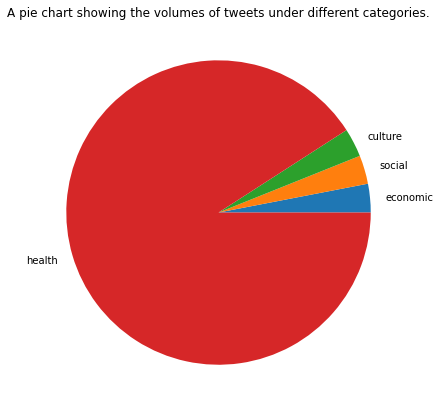

In [288]:
#A pie chart to show the total number of tweets in each category
figure = plt.figure(figsize =(10, 7)) 
a = pivot_clusters.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show() 

<h4><a><font color='#cc0000'> Note:</font></a></h4> 
    
* The huge percentage (almost 85%) in health due of the current pandemic, Covid19.(everyone is talking about it thus a huge volume of tweets). <br/>
* The 15% of the rest are cut in 3 (social, economic and culture)<br/>

### 3. KMeans Clustering

* Distance computation in k-Means weights each dimension equally and hence care must be taken to ensure that unit of dimension shouldn’t distort relative near-ness of observations. Common method is to unit-standardize each dimension individually.
The unit for the tweets are the same, thus no need.

#### 2D Clusters

<h4><a><font color='#cc0000'> Note:</font></a></h4>
    
* Due of the possibility to find a common  related words between the social, culture and economic related words, some tweets are classified as social,some tweets can be in the same time social and economic,and others social and culture.So this is mainnly a bias in the classification method.

#### Socio-Economic

In [289]:
from sklearn.cluster import KMeans

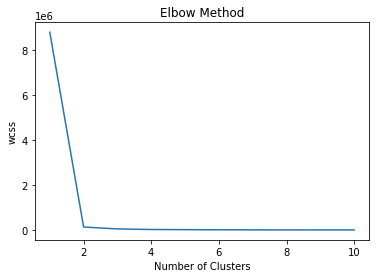

In [290]:
# X = pivot_clusters.iloc[:, [0,1]].values
X = pivot_clusters[['economic', 'social']].values
# Using the elbow method to find the optimal number of clusters
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

[0 0 0 ... 0 0 1]


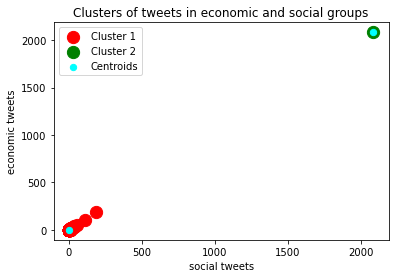

In [291]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)
# Visualising the clusters
#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 150, c = 'red', label = 'Cluster 1')
#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 150, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'cyan', label = 'Centroids')
plt.title('Clusters of tweets in economic and social groups')
plt.xlabel('social tweets')
plt.ylabel('economic tweets')
plt.legend()
plt.show()

#### Socio-Culture

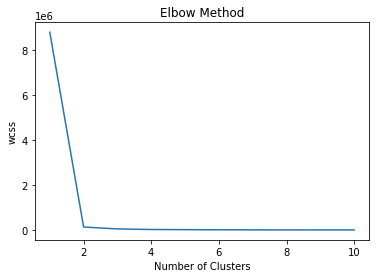

In [292]:
# X = pivot_clusters.iloc[:, [2,3]].values
X = pivot_clusters[['social','culture']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

[0 0 0 ... 0 0 1]


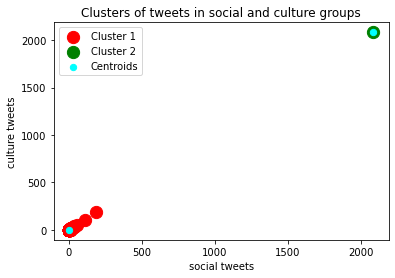

In [293]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)
# Visualising the clusters
#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 150, c = 'red', label = 'Cluster 1')
#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 150, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'cyan', label = 'Centroids')
plt.title('Clusters of tweets in social and culture groups')
plt.xlabel('social tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()

#### Socio-Health

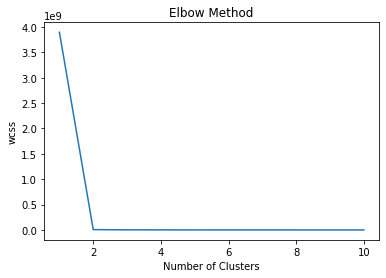

In [294]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['social', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


[0 0 0 ... 0 0 1]


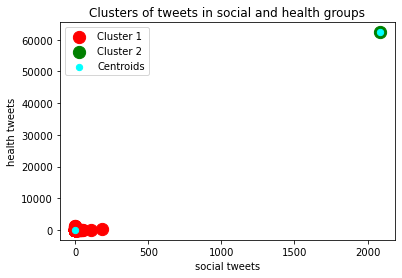

In [295]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)
# Visualising the clusters
#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 150, c = 'red', label = 'Cluster 1')
#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 150, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'cyan', label = 'Centroids')
plt.title('Clusters of tweets in social and health groups')
plt.xlabel('social tweets')
plt.ylabel('health tweets')
plt.legend()
plt.show()

#### Economic-health

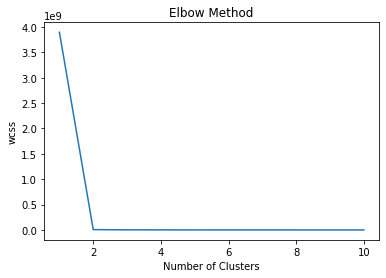

In [296]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['economic', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


[0 0 0 ... 0 0 1]


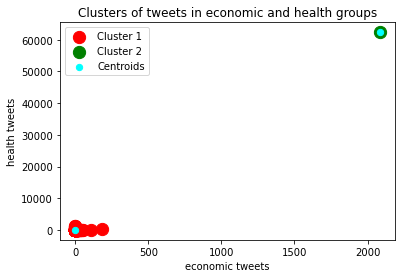

In [297]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)
# Visualising the clusters
#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 150, c = 'red', label = 'Cluster 1')
#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 150, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'cyan', label = 'Centroids')
plt.title('Clusters of tweets in economic and health groups')
plt.xlabel('economic tweets')
plt.ylabel('health tweets')
plt.legend()
plt.show()

####  Economic-Culture

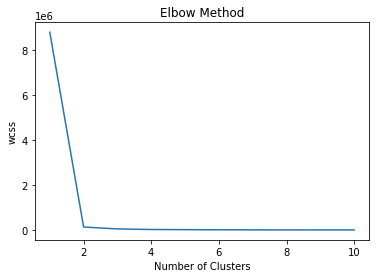

In [298]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['economic', 'culture']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


[0 0 0 ... 0 0 1]


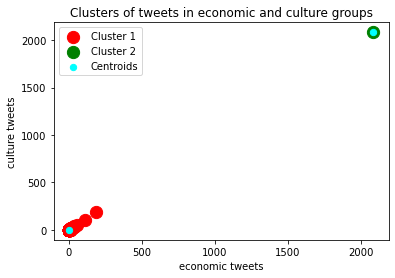

In [299]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)
# Visualising the clusters
#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 150, c = 'red', label = 'Cluster 1')
#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 150, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'cyan', label = 'Centroids')
plt.title('Clusters of tweets in economic and culture groups')
plt.xlabel('economic tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()

#### Health-Culture

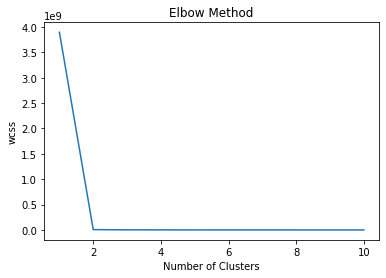

In [300]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['health', 'culture']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


[0 0 0 ... 0 0 1]


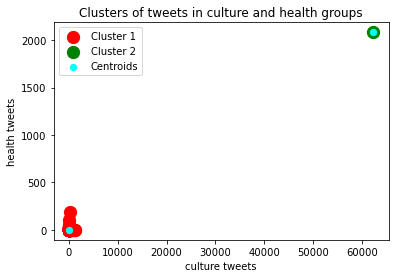

In [301]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)
# Visualising the clusters
#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 150, c = 'red', label = 'Cluster 1')
#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 150, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'cyan', label = 'Centroids')
plt.title('Clusters of tweets in culture and health groups')
plt.xlabel('culture tweets')
plt.ylabel('health tweets')
plt.legend()
plt.show()